
**Pima Indians Diabetes - EDA & Prediction** 
=====================================
----------
Bu kılavuz, makine öğrenimi çalışmalarını tamamlamak için aşağıdaki adımlarla ilgili rehberlik sunar:

* Eksik değerlerin yerine konması
* Keşfedici veri analizi
* Doğruluğu artırmak için yeni özelliklerin oluşturulması
* Özelliklerin kodlanması
* XGBM kullanımı ve hiperparametrelerin optimize edilmesi


![](http://image.noelshack.com/fichiers/2019/06/1/1549295827-0-0000.png)

### İÇİNDEKİLER
- <a href='#1'>1. Giriş</a> 
- <a href='#1'>2. Genel Bakış</a>  

    - <a href='#2.1'>2.1. Kütüphaneleri Yükleme</a> 
    - <a href='#2.2'>2.2. Veri Okuma</a> 
    - <a href='#2.3'>2.3. Veri Kontrolü</a> 
    - <a href='#2.4'>2.4. Eksik değerler</a>
    
 
    
- <a href='#3'>3. Eksik Değerleri Değiştirme ve EDA</a>

    - <a href='#3.1'>3.1. Insulin</a> 
    - <a href='#3.2'>3.2. Glucose</a> 
    - <a href='#3.3'>3.3. SkinThickness</a>
    - <a href='#3.4'>3.4. BloodPressure</a>
    - <a href='#3.5'>3.5. BMI</a>
    
- <a href='#4'>4. Yeni Özellikler (16) ve EDA</a>

- <a href='#5'>5. Veri Kümesi Hazırlama</a> 
    - <a href='#5.1'>5.1. StandardScaler ve LabelEncoder</a> 
    - <a href='#5.2'>5.2. Korelasyon Matrisi</a>
    - <a href='#5.3'>5.3. X ve y</a>
    - <a href='#5.4'>5.4. Model Performansı</a>
	- <a href='#5.4'>5.5. Skor Tabloları</a>
    
- <a href='#6'>6. Makine Öğrenmesi</a> 

    - <a href='#6.1'>6.1. RandomSearch + XGBM - Accuracy</a> 
    - <a href='#6.2'>6.2. XGBM - Discrimination Threshold</a>


## 1️⃣ Giriş
**Diyabet Nedir?**
Diyabet, pankreasın artık insülin üretemediği veya vücudun ürettiği insülini iyi şekilde kullanamadığı durumlarda ortaya çıkan kronik bir hastalıktır.

**Kullanılan veri kümesi:** *Pima Indians Diabetes Database ( https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data )*

Bu veri kümesi orijinal olarak Ulusal Diyabet ve Sindirim ve Böbrek Hastalıkları Enstitüsü'nden alınmıştır. Veri kümesinin amacı, veri kümesinde yer alan belirli tanısal ölçümlere dayanarak bir hastanın diyabet hastası olup olmadığını tanısal olarak tahmin etmektir. 

**Proje hakkında:**
Bu projenin amacı bir kişinin diyabet hastası olup olmadığını sınıflandırmaktır.
Veri seti birkaç Tıbbi Değişkenden (Bağımsız) ve bir Sonuç Değişkeninden (Bağımlı) oluşur
Bu veri setindeki bağımsız değişkenler şunlardır: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
Sonuç değişkeni değeri, kişinin diyabet hastası olup(1) olmadığını(0) belirten 1 veya 0'dır.

**Veri Kümesi Hakkında:**
Veri kümesinde yer alan özellikler ve açıklamaları: 

1. Pregnancies : Bir kadının hamile kalma sayısı
2. Glucose : Oral glukoz tolerans testinde 2 saatlik Plazma Glikoz konsantrasyonu
3. BloodPressure : Diyastolik Kan Basıncı (mm hg)
4. SkinThickness : Triceps cilt kıvrım kalınlığı (mm)
5. Insulin : 2 saatlik serum insülini(mu U/ml)
6. BMI : Vücut Kitle İndeksi ((kg cinsinden ağırlık/m cinsinden boy)^2)
7. Age : Yaş(yıl)
8. DiabetesPedigreeFunction : aile geçmişine dayalı olarak diyabet olasılığını puanlar
9. Outcome : 0 (diyabet hastası değil) veya 1 (diyabet hastası)

# <a id='1'> 2️⃣ Genel Bakış </a> 

## <a id='2.1'>2.1. Kütüphaneleri Yükleme</a> 

In [1]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

## <a id='2.2'>2.2. Verileri Okuma</a> 

In [2]:
data = pd.read_csv(r"C:\Users\tubitak\Desktop\ENFARKT\DIABETES\diabetes.csv")

# <a id='2.3'>2.3. Veri Kontrolü</a> 

In [3]:
def check_df(dataframe):
    print("*********************************** Shape ***********************************")
    print(dataframe.shape)
    print("\n********************************** Columns **********************************")
    print(dataframe.columns)
    print("\n*********************************** Info ************************************")
    dataframe.info()
    print("*********************************** Types ***********************************")
    print(dataframe.dtypes)
    print("*********************************** Head ************************************")
    print(dataframe.head())
    print("*********************************** Tail ************************************")
    print(dataframe.tail())
    print("************************************ NA *************************************")
    print(dataframe.isnull().sum())

In [4]:
check_df(data)

*********************************** Shape ***********************************
(768, 9)

********************************** Columns **********************************
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

*********************************** Info ************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    flo

In [5]:
## verilerle ilgili temel istatistik ayrıntıları (parametre include="all" olmadığı sürece burada yalnızca sayısal sütunların görüntüleneceğini unutmayın)
## referans için: https://pandas.pydata.org/pandas-docs/stable/generate/pandas.DataFrame.describe.html#pandas.DataFrame.describe
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [6]:
# 2 datasets
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#------------COUNT-----------------------
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

#------------PERCENTAGE-------------------
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

---
Aşağıdaki grafik verilerin dengesiz olduğunu göstermektedir. Diyabetik olmayan hasta sayısı 268, diyabetik hasta sayısı ise 500'dür.

In [7]:
target_count()
target_percent()

## <a id='2.4'>2.4. Eksik Değerler</a> 

Aşağıda listelenen sütunların minimum değeri sıfır (0) olabilir mi?
Bu sütunlarda sıfır değeri bir anlam ifade etmez ve bu nedenle eksik değeri gösterir.

Aşağıdaki sütunlar geçersiz bir sıfır değerine sahip:

* Glikoz
* Tansiyon
* Cilt Kalınlığı
* insülin
* BMI

Sıfırları NaN ile değiştirmek daha iyidir çünkü bundan sonra onları saymak daha kolay olur ve sıfırların uygun değerlerle değiştirilmesi gerekir.

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Şimdi, eksik değerlerin nerede olduğuna bakabiliriz:

In [9]:
# Veri kümesindeki tüm eksik değerleri tespit etmek için missing_plot fonksiyonu ile grafik tanımlama
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

In [10]:
missing_plot(data, 'Outcome')

Eksik Değerler : 
* Insulin = 48.7% - 374
* SkinThickness = 29.56% - 227
* BloodPressure = 4.56% - 35
* BMI = 1.43% - 11
* Glucose = 0.65% - 5

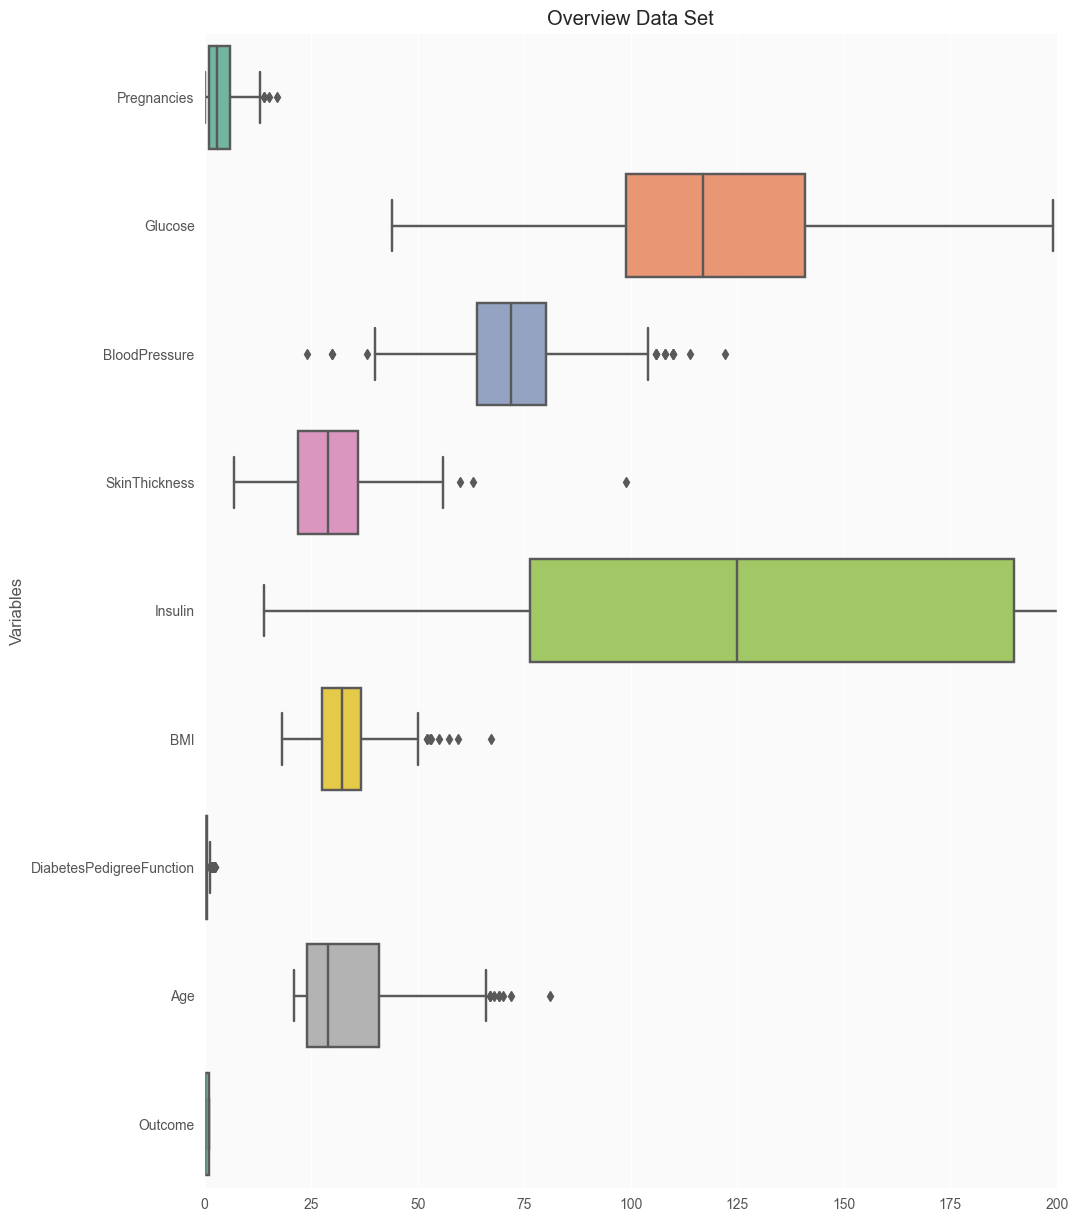

In [11]:
plt.style.use('ggplot') # ggplot2 stili görseller kullanma 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

Tüm eksik değerler NaN değeri ile değiştirildi

**Bu NaN değerlerini doldurmak için veri dağılımının hedefe göre anlaşılması gerekir.**. 

**Korelasyon matrisi**, değişken kümeleri arasındaki korelasyon katsayılarını gösteren bir tablodur. Tablodaki her bir rastgele değişken (Xi) tablodaki diğer değerlerin her biriyle (Xj) ilişkilidir. Bu, hangi çiftlerin en yüksek korelasyona sahip olduğunu görmeyi sağlar.

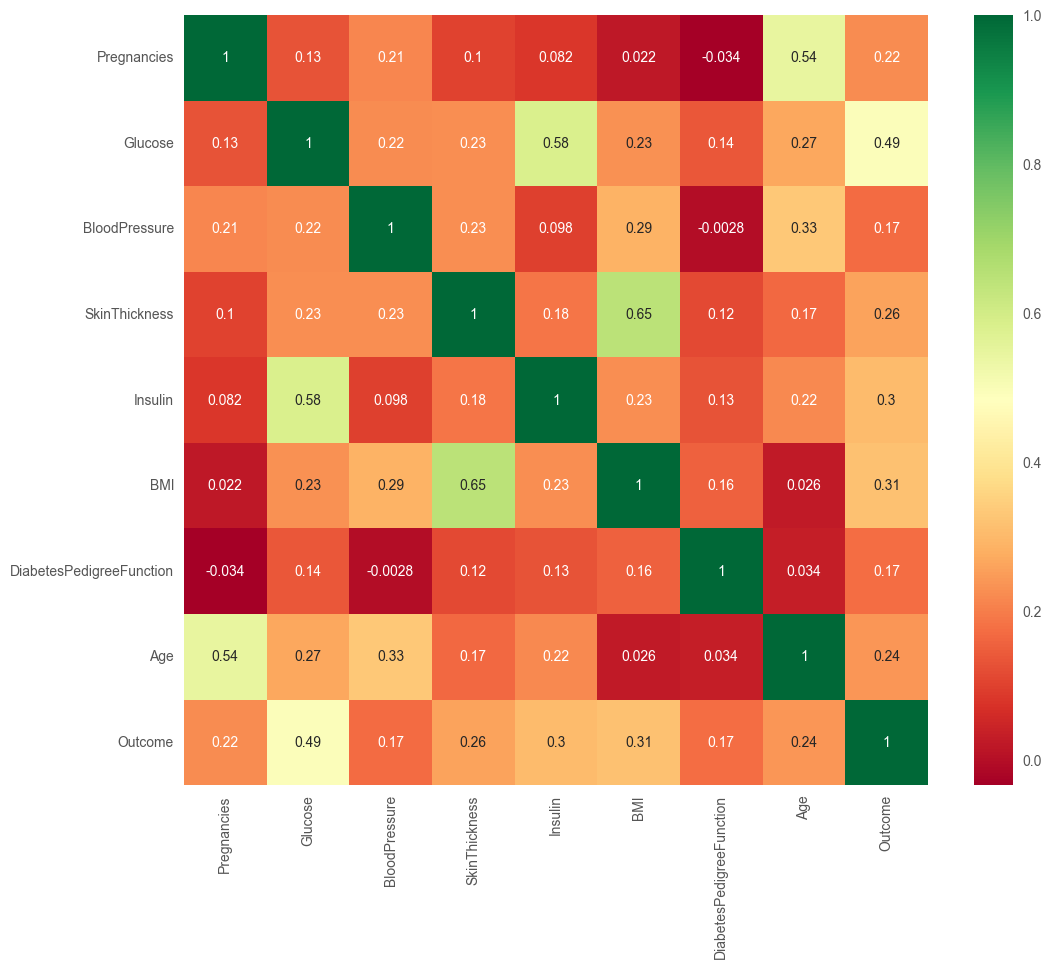

In [12]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn ile ısı haritası elde etme

# <a id='3'>3️⃣ Eksik Değerleri Değiştirme ve EDA</a> 


Aşağıda, NaN değerleri değişkenin orta değeri ile değiştirildi


Eksik değerleri değiştirmek için hedefe (Outcome) göre medyan kullanıldı 

In [13]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

## <a id='3.1'>3.1. Insulin</a> 

* **Insulin** : 2 Saatlik serum insülin (mu U/ml)

In [14]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [15]:
plot_distribution('Insulin', 0)

In [16]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

İnsülinin hedefe göre medyanları farklıdır. Sağlıklı bir kişi için 102,5 ve diyabetik bir kişi için 169,5

In [17]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

## <a id='3.2'>3.2. Glucose</a> 

* **Glucose** :  Oral glukoz tolerans testinde 2 saatte plazma glukoz konsantrasyonu

In [18]:
plot_distribution('Glucose', 0)

In [19]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [20]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

Sağlıklı bir kişi için 107 ve diyabetik bir kişi için 140

## <a id='3.3'>3.3. SkinThickness</a> 

* ** SkinThickness** : Triseps deri kıvrım kalınlığı (mm)

In [21]:
plot_distribution('SkinThickness', 10)

In [22]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [23]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

Sağlıklı bir kişi için 27 ve diyabetik bir kişi için 32

## <a id='3.4'>3.4. BloodPressure</a> 

* ** BloodPressure** : Diyastolik kan basıncı (mm Hg)

In [24]:
plot_distribution('BloodPressure', 5)

In [25]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [26]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

Sağlıklı bir kişi için 70 ve diyabetik bir kişi için 74.5

## <a id='3.5'>3.5. BMI</a> 

* **BMI** : Vücut kitle indeksi (kg cinsinden ağırlık/(m cinsinden boy)^2)

In [27]:
plot_distribution('BMI', 0)

In [28]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [29]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

* **Age** : Yaş (yıl)
* **DiabetesPedigreeFunction** : Diyabet soyağacı fonksiyonu
* **Pregnancies** : Kaç kez hamile kalındığı

In [30]:
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [31]:
missing_plot(data, 'Outcome')

Tüm özellikler tamamlandı! Şimdi yeni özellikler oluşturabiliriz.

# <a id='4'>4️⃣ Yeni Özellikler (16) ve EDA</a> 

Burada, 3 grafik fonksiyonu tanımlıyoruz

In [32]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [33]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [34]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

* **Glucose and Age**

In [35]:
plot_feat1_feat2('Glucose','Age')

Sağlıklı kişiler <= 30 yaş ve <= 120 glikoz konsantrasyonuna sahiptir.

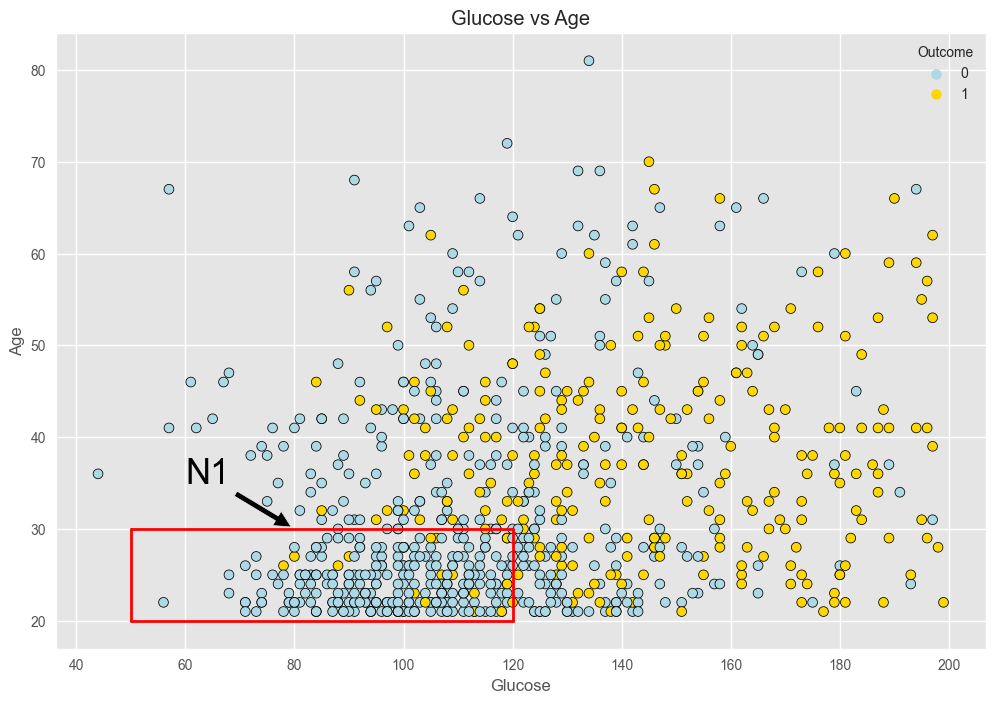

In [36]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

In [37]:
data.loc[:,'N1']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'N1']=1

In [38]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [39]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

* **BMI **

Vücut kitle indeksi (BMI) veya Quetelet indeksi, bir bireyin kütlesi (ağırlığı) ve boyundan elde edilen bir değerdir. Vücut kütlesinin boy uzunluğunun karesine bölünmesiyle elde edilir ve evrensel olarak kg/m2 birimiyle ifade edilir; kütle kilogram ve boy metre cinsinden hesaplanır.

30 kg/m² obezite için sınırdır

In [40]:
data.loc[:,'N2']=0
data.loc[(data['BMI']<=30),'N2']=1

In [41]:
barplot('N2', ': BMI <= 30')

In [42]:
plot_pie('N2', 'BMI <= 30')

* **Pregnancies and Age**

In [43]:
plot_feat1_feat2('Pregnancies','Age')

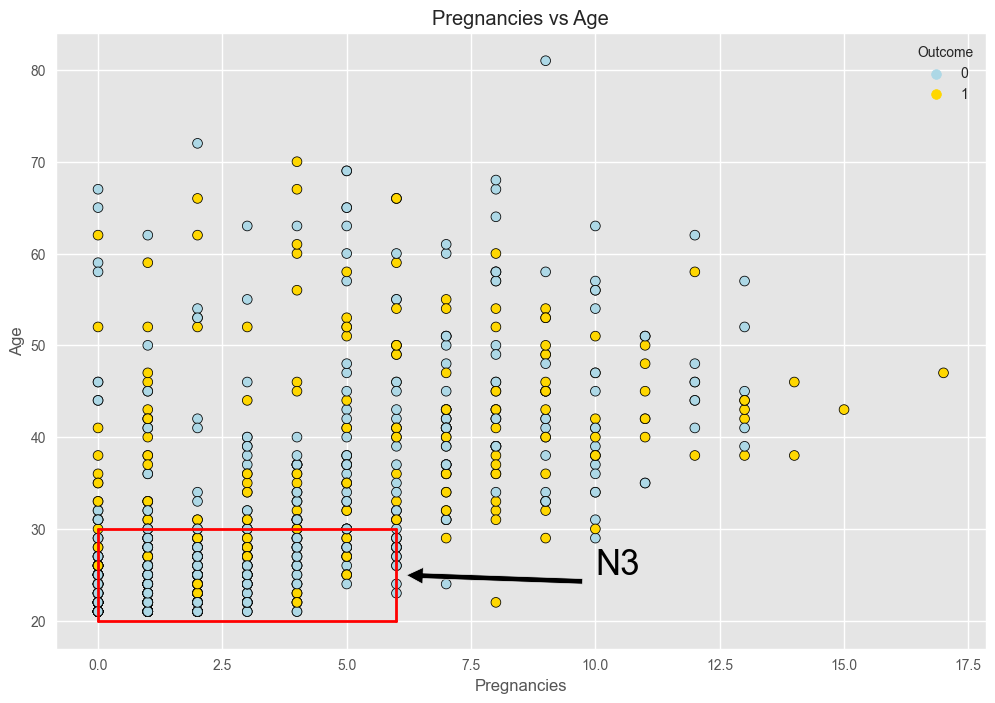

In [44]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

In [45]:
data.loc[:,'N3']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'N3']=1

In [46]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [47]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

* **Glucose and BloodPressure**

In [48]:
plot_feat1_feat2('Glucose','BloodPressure')

Sağlıklı kişiler, kan basıncı <= 80 ve glikoz <= 105 olan konsantre kişilerdir.

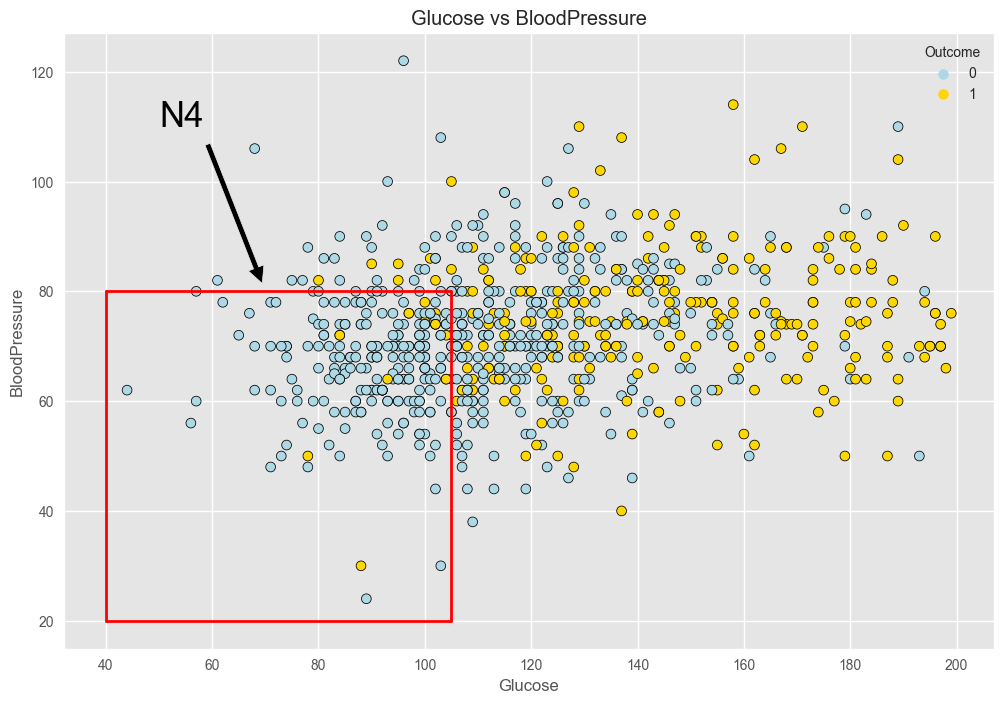

In [49]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BloodPressure'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [50]:
data.loc[:,'N4']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'N4']=1

In [51]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [52]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

* **SkinThickness**

In [53]:
data.loc[:,'N5']=0
data.loc[(data['SkinThickness']<=20) ,'N5']=1

In [54]:
barplot('N5', ':SkinThickness <= 20')

In [55]:
plot_pie('N5', 'SkinThickness <= 20')

* **SkinThickness and BMI**

In [56]:
plot_feat1_feat2('SkinThickness','BMI')

Sağlıklı kişiler BMI < 30 ve deri kalınlığı <= 20 olan konsantre kişilerdir

In [57]:
data.loc[:,'N6']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'N6']=1

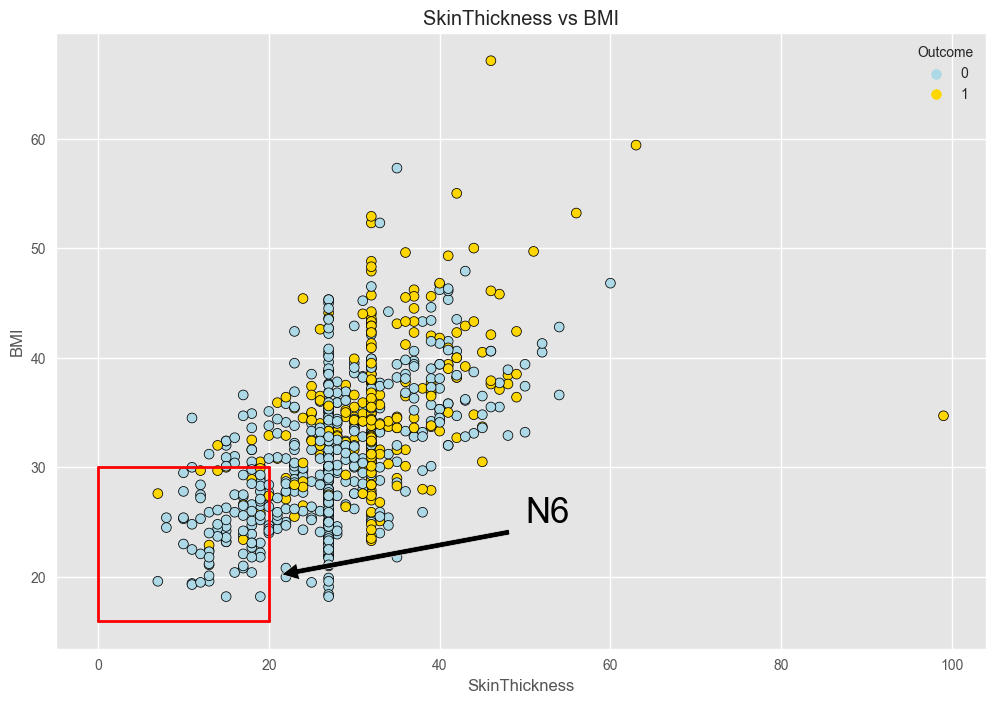

In [58]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [59]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [60]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

* **Glucose and BMI**

In [61]:
plot_feat1_feat2('Glucose','BMI')

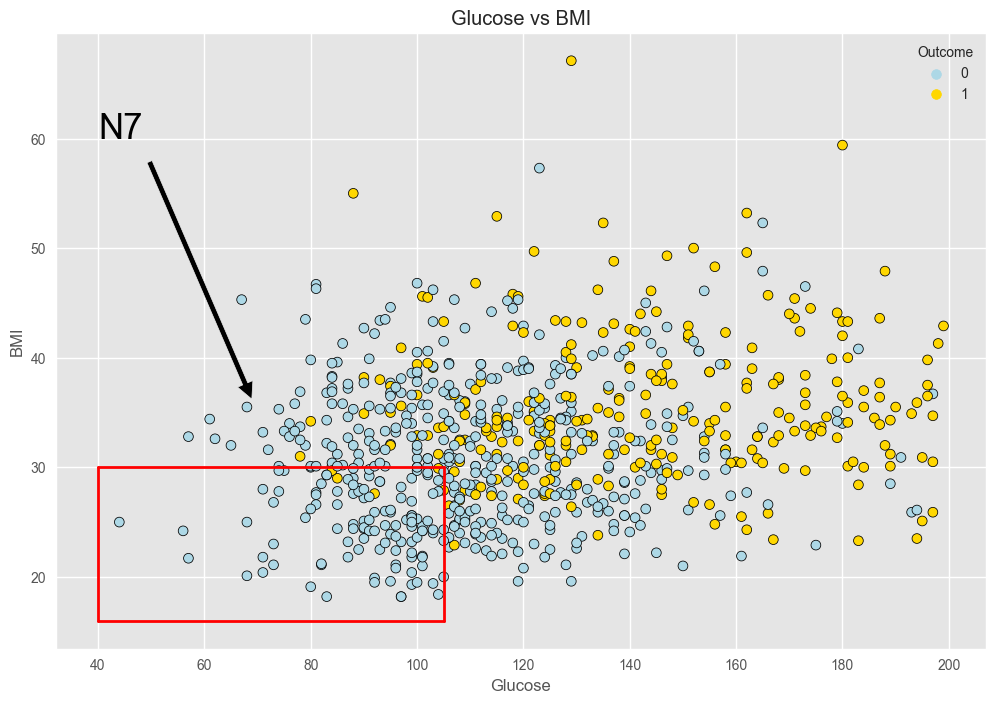

In [62]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [63]:
data.loc[:,'N7']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'N7']=1

In [64]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [65]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

* **Insulin**

In [66]:
plot_distribution('Insulin', 0)

In [67]:
data.loc[:,'N9']=0
data.loc[(data['Insulin']<200),'N9']=1

In [68]:
barplot('N9', ': Insulin < 200')

In [69]:
plot_pie('N9', 'Insulin < 200')

* **BloodPressure**

In [70]:
data.loc[:,'N10']=0
data.loc[(data['BloodPressure']<80),'N10']=1

In [71]:
barplot('N10', ': BloodPressure < 80')

In [72]:
plot_pie('N10', 'BloodPressure < 80')

* **Pregnancies**

In [73]:
plot_distribution('Pregnancies', 0)

In [74]:
data.loc[:,'N11']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'N11']=1

In [75]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [76]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

* **Others**

In [77]:
data['N0'] = data['BMI'] * data['SkinThickness']

data['N8'] =  data['Pregnancies'] / data['Age']

data['N13'] = data['Glucose'] / data['DiabetesPedigreeFunction']

data['N12'] = data['Age'] * data['DiabetesPedigreeFunction']

data['N14'] = data['Age'] / data['Insulin']


In [78]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

Yeni özelliklerden yeni bir özellik türetme

In [79]:
plot_distribution('N0', 0)

In [80]:
data.loc[:,'N15']=0
data.loc[(data['N0']<1034) ,'N15']=1

In [81]:
barplot('N15', ': N0 < 1034')

In [82]:
plot_pie('N15', 'N0 < 1034')

# <a id='5'>5️⃣ Veri Kümesi Hazırlama</a> 

## <a id='5.1'>5.1. StandardScaler ve LabelEncoder</a> 

**StandardScaler** :
Ortalamayı kaldırarak ve birim varyansa ölçeklendirerek özellikleri standartlaştma:



Merkezleme ve ölçekleme, kümedeki örnekler üzerinde ilgili istatistikleri hesaplayarak her özellik üzerinde bağımsız olarak gerçekleşir. Ortalama ve standart sapma daha sonra dönüştürme yöntemi kullanılarak daha sonraki verilerde kullanılmak üzere saklanır.

Bir veri kümesinin standartlaştırılması, birçok makine öğrenimi tahmin edicisi için ortak bir gerekliliktir: tek tek özellikler aşağı yukarı standart normal dağılımlı verilere (örneğin, 0 ortalama ve birim varyanslı Gauss) benzemiyorsa kötü davranabilirler.

**LabelEncoder** : Etiketler 0 ile n_classes-1 arasında değerlerle kodlanır.

Aşağıda, algoritmayı düzgün bir şekilde beslemek için veriler hazırlandı.

In [83]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

Şimdi, korelasyon matrisini hesaplayabiliriz

## <a id='5.2'>5.2. Korelasyon Matrisi</a> 

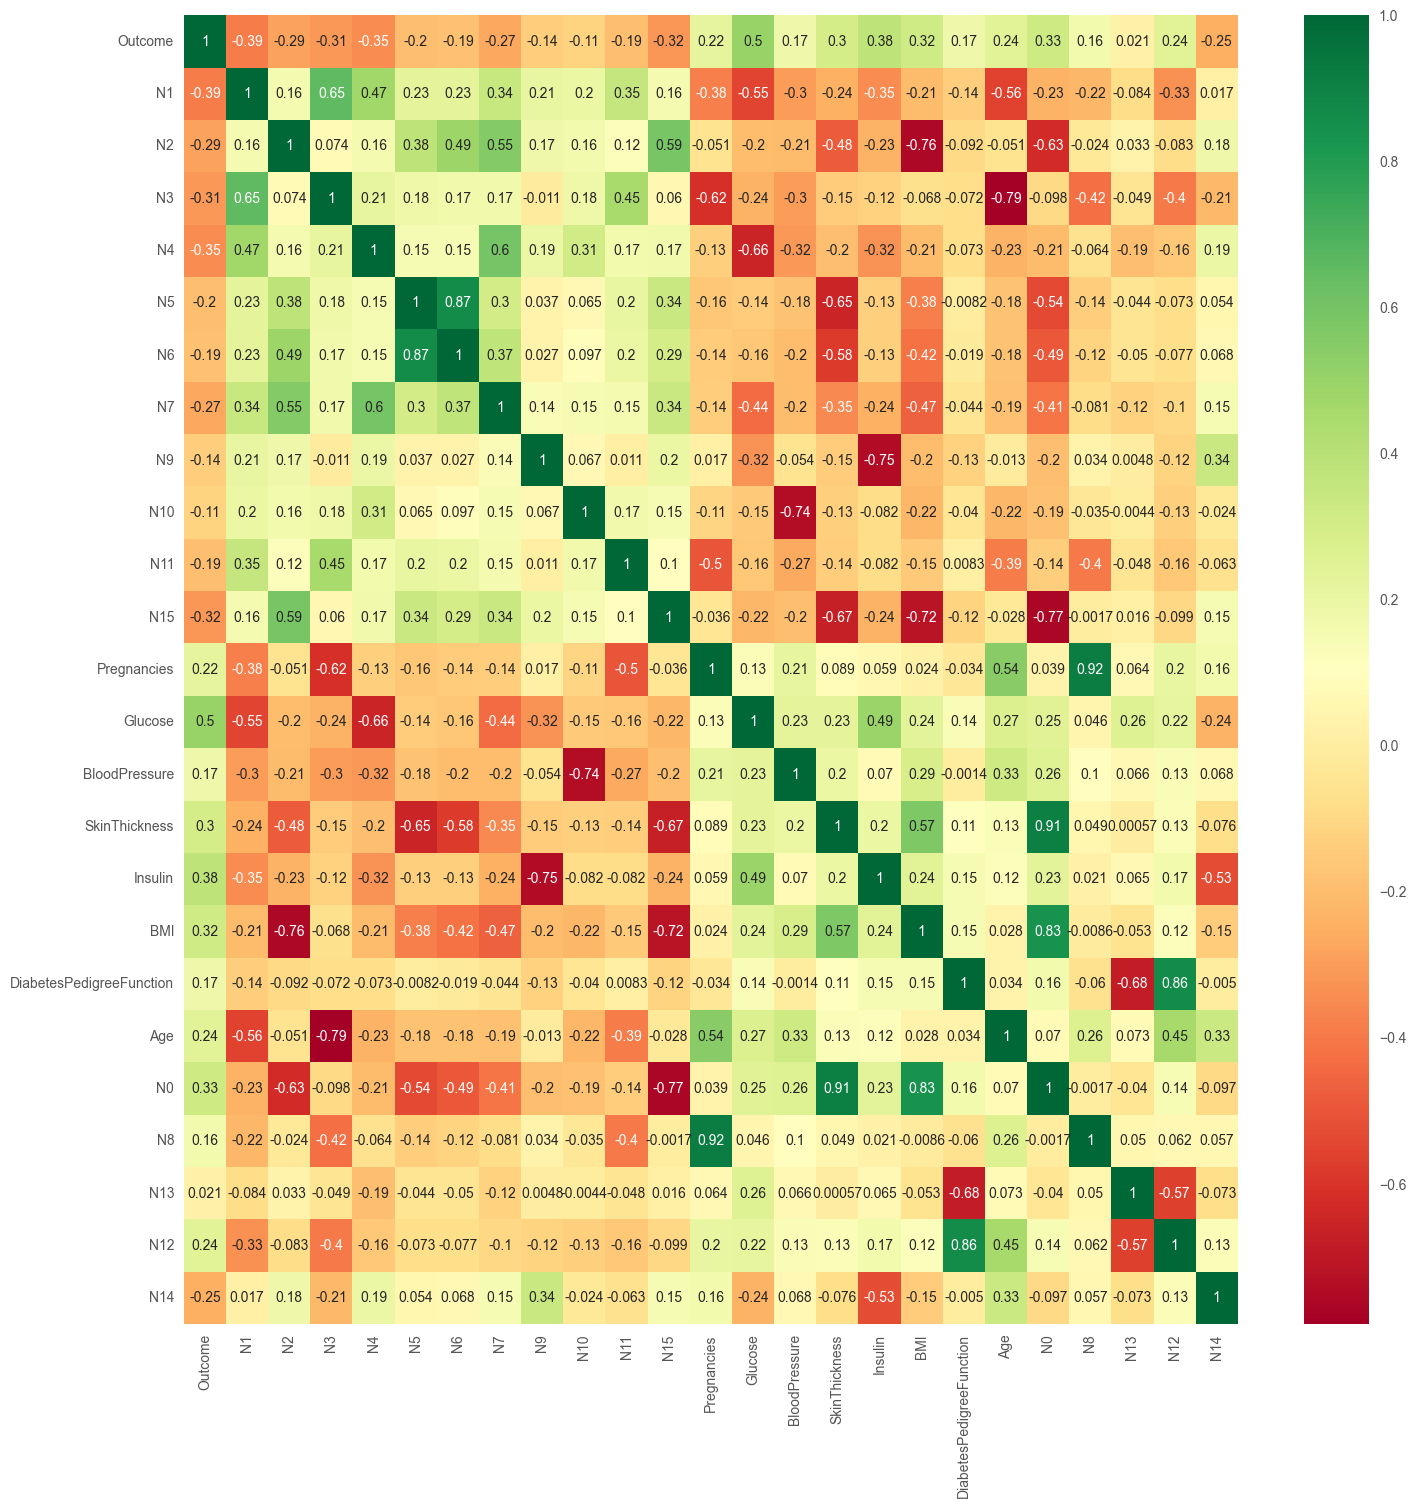

In [84]:
plt.figure(figsize=(17,17)) 
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

## <a id='5.3'>5.3. X ve y</a> 

X ve y'yi tanımlıyoruz:

In [85]:
X = data.drop('Outcome', 1)
y = data['Outcome']

## <a id='5.4'>5.4. Model Performansı</a> 

Bir modelin performansını ölçmek için birkaç unsura ihtiyacımız var :

Bu kısım çok önemlidir

* **Karmaşıklık matrisi** : bir algoritmanın performansının görselleştirilmesini sağlar:


    * True Positive (TP): Diyabetli doğru bir şekilde diyabetli olarak tanımlandı.
    * True Negative (TN): Sağlıklı doğru bir şekilde sağlıklı olarak tanımlandı.
    * False Positive (FP): Sağlıklı yanlışlıkla diyabetli olarak tanımlandı.
    * False Negative (FN): Diyabetli yanlışlıkla sağlıklı olarak tanımlandı.
---
* **Metrikler ** :

    * Accuracy (Doğruluk ) : (TP +TN) / (TP + TN + FP +FN)
    * Precision (Hassasiyet) : TP / (TP + FP)
    * Recall (Geri Çağırma) : TP / (TP + FN)
    * F1 score ( F1 puanı) : 2 x ((Precision x Recall) / (Precision + Recall))
    
    
---
* **Roc Curve** : ROC eğrisi, çeşitli eşik ayarlarında doğru pozitif oranının (TPR) yanlış pozitif oranına (FPR) karşı çizilmesiyle oluşturulur.

---

* **Precision Recall Curve** :  Farklı eşik değerleri için hassasiyet ve geri çağırma arasındaki dengeyi gösterir.

Algoritmamızı eğitmek ve test etmek için çapraz doğrulama K-Fold kullanacağız.


K-kat çapraz doğrulamada, orijinal örnek rastgele k adet eşit büyüklükte alt örneğe bölünür. K alt örnekten tek bir alt örnek modelin test edilmesi için doğrulama verisi olarak seçilir ve kalan k - 1 alt örnek eğitim verisi olarak kullanılır. Çapraz doğrulama işlemi, k alt örneğin her birinin sırayla doğrulama verisi olarak kullanılması ve diğer alt örneklerin eğitim verisi olarak kullanılmasıyla k kez tekrarlanır. Daha sonra, elde edilen k sonucun ortalaması alınarak tek bir tahmin üretilebilir. Bu yöntemin tekrarlanan rastgele alt örnekleme yaklaşımına göre avantajı, tüm gözlemlerin hem eğitim hem de doğrulama için kullanılması ve her gözlemin doğrulama için tam olarak bir kez kullanılmasıdır.

Aşağıda Plotly ile stilize edilmiş bir rapor tanımlandı.

In [86]:
def model_performance(model, subtitle) :   
    #Kfold
    cv = KFold(n_splits=5,shuffle=True, random_state = 42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    
    for train,test in cv.split(X,y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:,1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:,1])
        fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc) 
    
    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)
    
    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #Roc curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                        name = "Roc : " ,
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    #Precision - recall curve
    y_real = y
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    mean_auc=round(mean_auc,3)
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(mean_auc)+')',
                                          'Precision - Recall curve',
                                          ))
    #Trace and layout
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report (5 folds)</b><br>'+subtitle,
                        autosize = False, height = 830, width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color = 'white')
    fig["layout"]["yaxis1"].update(color = 'white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')))
    fig["layout"]["yaxis2"].update(color = 'white')
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"), color = 'white')
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white')
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white')
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)

## <a id='5.5'>5.5. Skor Tabloları</a> 

Model performans raporu, tüm sonuçları katlayarak içeren bir tablo ile tamamlandı.

In [87]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'precision', 2:'recall',3:'f1',4:'roc_auc'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 score', '<b>Roc auc'],
                    line = dict(color='#7D7F80'),
                    fill = dict(color='#a1c3d1'),
                    align = ['center'],
                    font = dict(size = 15)),
        cells=dict(values=[('1','2','3','4','5','mean', 'std'),
                           np.round(df['accuracy'],3),
                           np.round(df['precision'],3),
                           np.round(df['recall'],3),
                           np.round(df['f1'],3),
                           np.round(df['roc_auc'],3)],
                   line = dict(color='#7D7F80'),
                   fill = dict(color='#EDFAFF'),
                   align = ['center'], font = dict(size = 15)))

    layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
    fig = dict(data=[trace], layout=layout)

    py.iplot(fig, filename = 'styled_table')

# <a id='6'>6️⃣ Makine Öğrenmesi</a> 

## <a id='6.1'>6.1. RandomSearch + XGBM - Accuracy</a> 

**Extreme Gradient Boosting Machine (XGBM)** hızlı ve etkili bir gradyan artırma algoritmasıdır ve özellikle sınıflandırma ve regresyon problemleri için yaygın olarak kullanılan bir makine öğrenimi tekniğidir. XGBoost kütüphanesi, bu algoritmanın uygulanmasını sağlayan popüler bir araçtır. Bu nedenle, "XGBM" terimi genellikle XGBoost kütüphanesi veya Extreme Gradient Boosting algoritması için kullanılır.

En iyi hiperparametreleri bulmak için **Random Search CV** kullanıldı.

Random search, oluşturulan model için en iyi çözümü bulmak amacıyla hiperparametrelerin rastgele kombinasyonlarının kullanıldığı bir tekniktir. Genel olarak RS, tüm olası kombinasyonları hesaplayan GridSearchCV'den daha hızlı ve doğrudur. Random Grid ile istediğimiz kombinasyon sayısını belirleriz.

---
**XGBM : Hiperparametreler ** :

* learning_rate : Bu, her ağacın nihai sonuç üzerindeki etkisini belirler. GB, her ağacın çıktısı kullanılarak güncellenen bir ilk tahminle başlayarak çalışır. Öğrenme parametresi, tahminlerdeki bu değişikliğin büyüklüğünü kontrol eder

* n_estimators : ağaç sayısı (veya tur)

* num_leaves : tam ağaçtaki yaprak sayısı, varsayılan: 31

* min_child_samples : bir yapraktaki minimum veri sayısı. Aşırı uyum ile başa çıkmak için kullanılabilir

* min_child_weight : bir yaprakta minimum toplam kesir.

* subsample : yeniden örnekleme yapmadan verilerin bir kısmını rastgele seçme

* max_depth : Ağacın maksimum derinliğini tanımlar. Bu parametre modelin aşırı uyumunu ele almak için kullanılır.

* colsample_bytree : colsample_bytree 1.0'dan küçükse XGBM her iterasyonda özelliklerin bir kısmını rastgele seçecektir. Örneğin, 0,8 olarak ayarlarsanız, XGBM her ağacı eğitmeden önce özelliklerin %80'ini seçecektir

* reg_alpha : normalleştirme

* reg_lambda : normalleştirme

* early_stopping_rounds : Bu parametre analizinizi hızlandırmanıza yardımcı olabilir. Bir doğrulama verisinin bir metriği son early_stopping_round turlarında iyileşmezse model eğitimi durduracaktır. Bu, aşırı iterasyonları azaltacaktır

In [89]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint, uniform as sp_uniform

random_state=42
# LightGBM'den XGBoost'a göre optimize edilmiş parametreler
param_test = {'learning_rate': [0.01, 0.02, 0.03, 0.04],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5, 6],
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1],
              'gamma': [0, 0.1, 0.2, 0.3, 0.4],
              'subsample': [0.6, 0.7, 0.8, 0.9],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
              'reg_alpha': [0, 0.1, 1],
              'reg_lambda': [0, 0.1, 1],
              'scale_pos_weight': [1, 2, 3]}

# RandomizedSearchCV için iterasyon sayısı
n_iter = 100

# XGBoost modeli oluşturma
xgb_clf = xgb.XGBClassifier(random_state=random_state, n_jobs=4)

# Parametre araması için RandomizedSearchCV kullanma
grid_search = RandomizedSearchCV(
    estimator=xgb_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=1)

# Modeli eğitme ve parametre optimizasyonunu gerçekleştirme
grid_search.fit(X, y)

# En iyi parametreleri bulma
opt_parameters =  grid_search.best_params_

# En iyi parametrelerle XGBoost modelini oluşturma
xgb_clf_best = xgb.XGBClassifier(**opt_parameters)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [90]:
model_performance(xgb_clf_best, 'xgb_clf_best')
scores_table(xgb_clf_best, 'xgb_clf_best')

## <a id='6.2'>6.2. XGBM - Discrimination Threshold</a> 

* **Discrimination Threshold** :
İkili bir sınıflandırıcının ayrım eşiği ile ilgili olarak hassasiyet, geri çağırma, f1 puanı ve bekleme oranının görselleştirilmesi. Ayrım eşiği, pozitif sınıfın negatif sınıfa göre seçilme olasılığı veya puanıdır

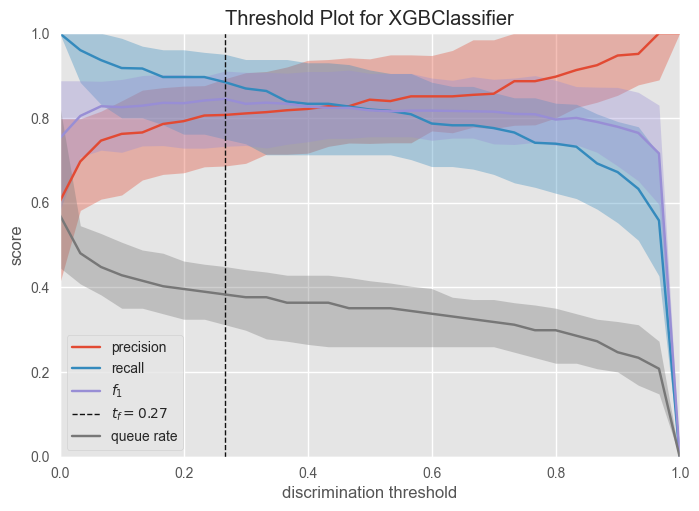

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [91]:
visualizer = DiscriminationThreshold(xgb_clf_best)

visualizer.fit(X, y)  
visualizer.poof() 